# Wine Quality Prediction using Different Machine Learning Models 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Load Data

In [2]:
data = pd.read_csv("D:/shivani/Wine Quality Dataset/WineQT.csv")  

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Data Preprocessing

In [6]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [7]:
# Check data types
print(data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


## Standardize Features

In [8]:
# Define features and target variable
X = data.drop(['quality', 'Id'], axis=1)
y = data['quality']  

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Exploratory Data Analysis (EDA)

In [9]:
# Summary statistics
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

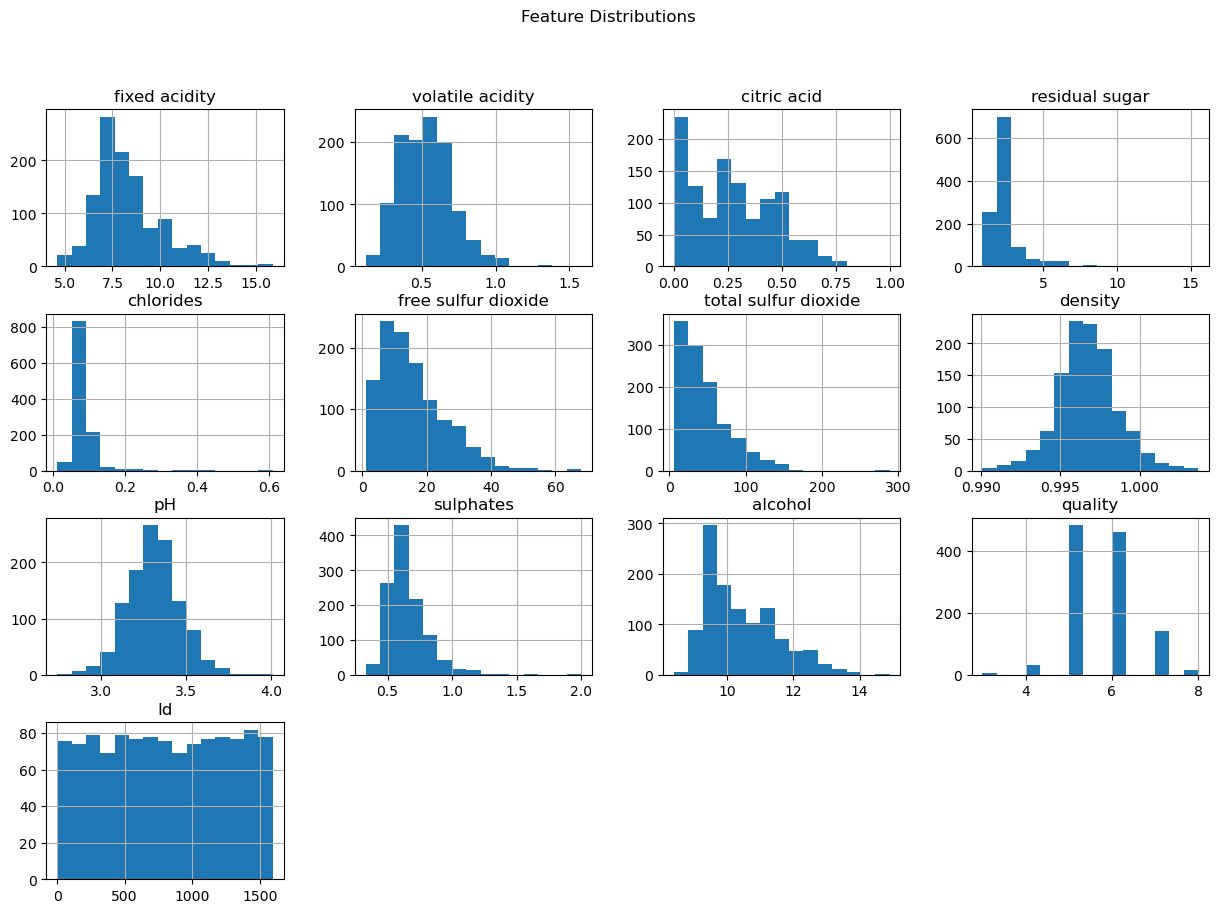

In [10]:
# Histograms for feature distribution
data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

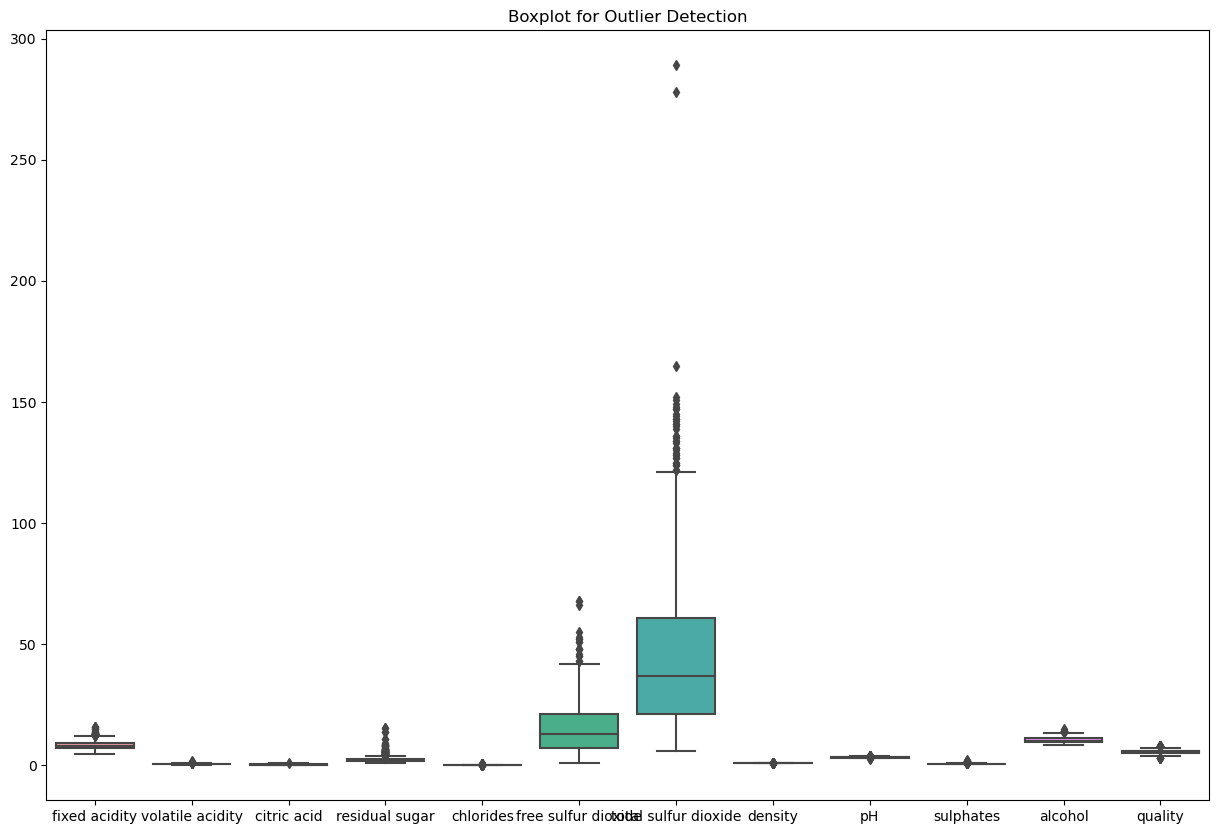

In [11]:
# Box plot for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop(columns=['Id']))
plt.title("Boxplot for Outlier Detection")
plt.show()

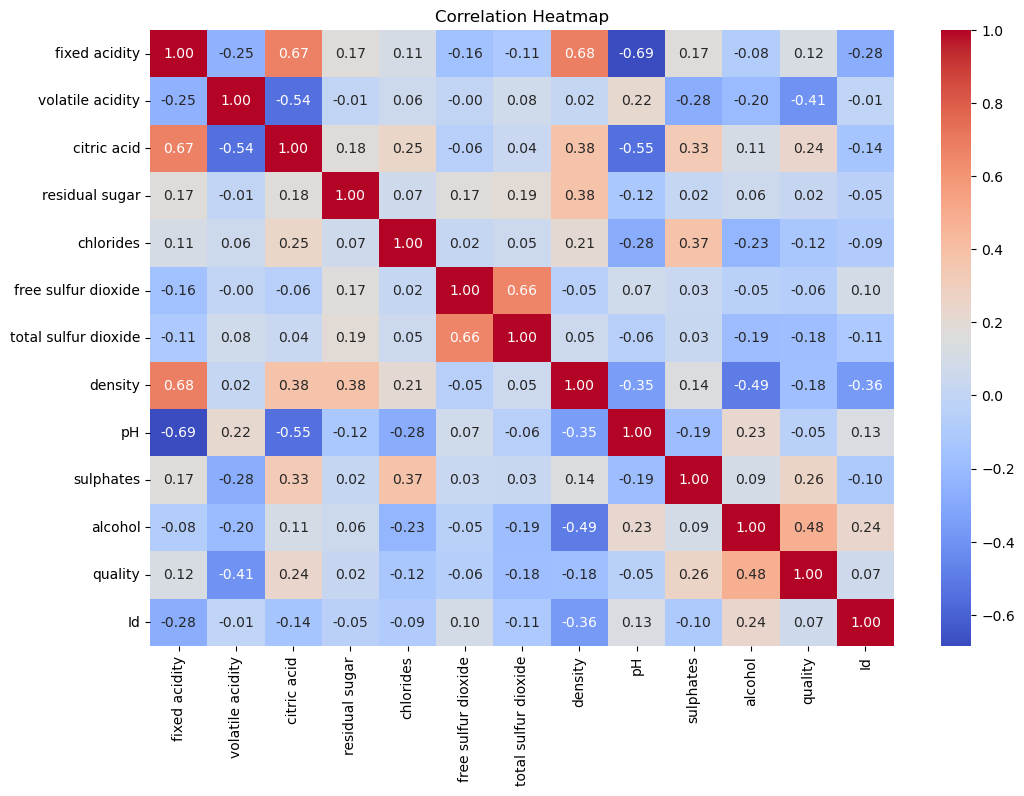

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Model Training and Evaluation
## Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [14]:
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nModel: {model_name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        
        results[model_name] = accuracy
    return results

In [15]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=500)
}

results = train_and_evaluate(models, X_train, X_test, y_train, y_test)


Model: Logistic Regression
Accuracy: 0.6288
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.62      0.64      0.63        99
           7       0.48      0.42      0.45        26
           8       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.36      0.36      0.36       229
weighted avg       0.61      0.63      0.62       229

Confusion Matrix:
[[ 0  3  3  0  0]
 [ 1 70 23  2  0]
 [ 0 28 63  8  0]
 [ 0  2 13 11  0]
 [ 0  0  0  2  0]]

Model: Decision Tree
Accuracy: 0.5415
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.11      0.17      0.13         6
           5       0.65      0.61      0.63        96
           6       0.54      0.51      0.52        99
           7       0.45      0.50      0.47    

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r


Model: Random Forest
Accuracy: 0.6550
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.67      0.78      0.72        96
           6       0.64      0.60      0.62        99
           7       0.64      0.62      0.63        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.39      0.40      0.39       229
weighted avg       0.63      0.66      0.64       229

Confusion Matrix:
[[ 0  4  2  0  0]
 [ 0 75 20  1  0]
 [ 0 33 59  7  0]
 [ 0  0 10 16  0]
 [ 0  0  1  1  0]]

Model: SVM
Accuracy: 0.6376
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accu

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r


Model: Gradient Boosting
Accuracy: 0.6681
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.71      0.74      0.72        96
           6       0.65      0.67      0.66        99
           7       0.80      0.62      0.70        26
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.36      0.34      0.35       229
weighted avg       0.67      0.67      0.67       229

Confusion Matrix:
[[ 0  0  0  0  0  0]
 [ 0  0  3  3  0  0]
 [ 1  2 71 21  0  1]
 [ 1  2 26 66  3  1]
 [ 0  0  0 10 16  0]
 [ 0  0  0  1  1  0]]


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Neural Network
Accuracy: 0.6245
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.75      0.72        96
           6       0.60      0.59      0.59        99
           7       0.48      0.50      0.49        26
           8       0.00      0.00      0.00         2

    accuracy                           0.62       229
   macro avg       0.36      0.37      0.36       229
weighted avg       0.61      0.62      0.61       229

Confusion Matrix:
[[ 0  3  3  0  0]
 [ 1 72 21  2  0]
 [ 1 28 58 12  0]
 [ 0  1 12 13  0]
 [ 0  0  2  0  0]]


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_clas

## Model Comparison

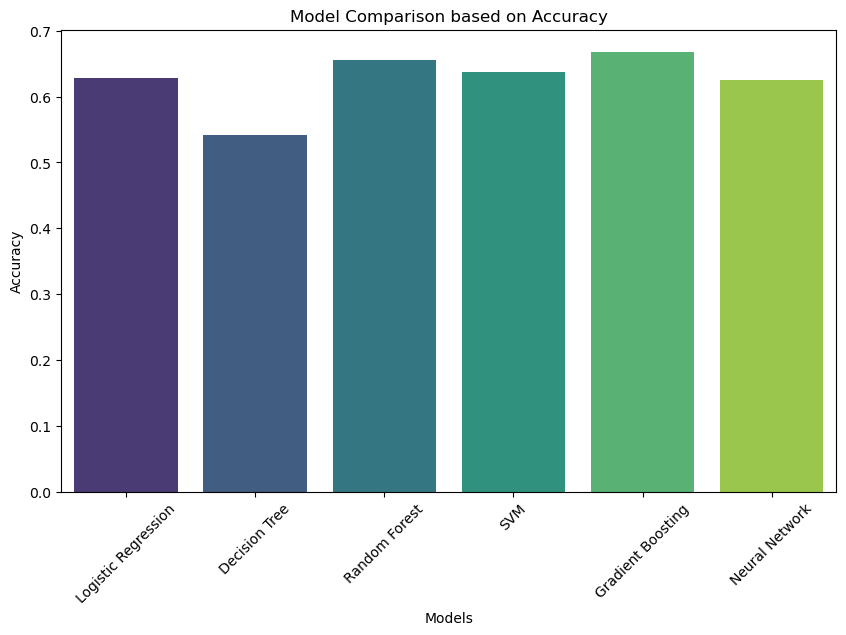

In [16]:
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison based on Accuracy")
plt.xticks(rotation=45)
plt.show()

In [17]:
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse, rmse, r2 = regression_metrics(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3102943231441048
Root Mean Squared Error: 0.557040683562794
R-squared: 0.442391042423412
